# Instalação das bibliotécas

In [706]:
import pandas as pd #importar principais bibliotecas para auxiliar na leitura, manipulação, tratamento e análise dos dados
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Biblioteca para Machine Learning
from sklearn.model_selection import train_test_split # Função para dividir um conjunto de dados em conjuntos de treinamento e teste.
from sklearn.linear_model import LogisticRegression # Classe para realizar regressão logística.
from sklearn.ensemble import RandomForestClassifier  # Classe para construir um modelo de classificação usando um conjunto de árvores de decisão aleatórias.
from sklearn.ensemble import GradientBoostingClassifier # Classe para construir um modelo de classificação usando a técnica de boosting com árvores de decisão.
from sklearn.tree import DecisionTreeClassifier # Classe para construir um modelo de classificação baseado em uma árvore de decisão.
from sklearn.svm import SVC # Classe para construir um modelo de classificação ou regressão usando máquinas de vetores de suporte.
from sklearn.neighbors import KNeighborsClassifier # Classe para construir um modelo de classificação baseado no algoritmo k-vizinhos mais próximos (KNN).
from sklearn.neural_network import MLPClassifier # Classe para construir um modelo de classificação usando uma rede neural perceptron multicamada (MLP).
from sklearn.naive_bayes import MultinomialNB # Classe para construir um modelo de classificação usando o algoritmo Naive Bayes multinomial.
from xgboost import XGBClassifier # Classe para construir um modelo de classificação usando o algoritmo LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Função para calcular a precisão de um modelo de classificação.

# Carregar arquivo

In [707]:
dados = pd.read_csv('Carbon Emission.csv')
#https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation

# Análise dos dados

In [708]:
dados.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [709]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [710]:
dados.isna().sum()

,0
Body Type,0
Sex,0
Diet,0
How Often Shower,0
Heating Energy Source,0
Transport,0
Vehicle Type,6721
Social Activity,0
Monthly Grocery Bill,0
Frequency of Traveling by Air,0


In [711]:
#Cria um dataframe só com as pessoas que o valor esta nulo
transporte = dados[dados.isnull().any(axis=1)]

In [712]:
#Pega os tipos únicos de resposta na coluna Transport
quais = transporte['Transport'].unique()
print(quais)

['public' 'walk/bicycle']


In [713]:
def Transport(tipo):
  print(f'{transporte[transporte["Transport"] == tipo]["Transport"].count()} usam {tipo} como meio de transporte!')
#Mostra o texto mais a contagem de pessoas que se encaixam dentro do tipo de transporte

for ver in quais:
  Transport(ver)

3294 usam public como meio de transporte!
3427 usam walk/bicycle como meio de transporte!


In [714]:
dados.duplicated().sum()

0

# Pré-processamento

In [715]:
dados['Vehicle Type'] = dados['Vehicle Type'].fillna('Not provided')

In [716]:
def colunas(coluna):
  print(coluna, ':', dados[coluna].unique())

In [717]:
colu = dados.columns
for ver in colu:
  colunas(ver)

Body Type : ['overweight' 'obese' 'underweight' 'normal']
Sex : ['female' 'male']
Diet : ['pescatarian' 'vegetarian' 'omnivore' 'vegan']
How Often Shower : ['daily' 'less frequently' 'more frequently' 'twice a day']
Heating Energy Source : ['coal' 'natural gas' 'wood' 'electricity']
Transport : ['public' 'walk/bicycle' 'private']
Vehicle Type : ['Not provided' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']
Social Activity : ['often' 'never' 'sometimes']
Monthly Grocery Bill : [230 114 138 157 266 144  56  59 200 135 146 111 123 225 219 104 126 288
 282  69 110 165  62  94 259  67 130 258 189 262 280 121 174 173 199  64
 100 240 245 270 294  87 209 124 276  90 136 246 253 281  82  73  98 256
 287  63 158 241 176 214 264 213 125 188 251 285 234  91 118  75 134 202
 223 141 236  95 249  81 291  70  89 198  84 182 275 228 140 232 115 156
 252 162 145 205 178 286 108  76 221 295 177 193 238 101  99  50  71 247
 222  61 137  66 105  80 210 152 260 283 277 203  96 233 147  83  77 254
 207  93  

In [718]:
copia_graficos = dados.copy()
copia_cluster = dados.copy()

In [719]:
dados = pd.get_dummies(dados, columns=['Sex', 'Diet'], drop_first=False)

In [720]:
dados[['Sex_female', 'Sex_male', 'Diet_omnivore', 'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian']] = dados[['Sex_female', 'Sex_male', 'Diet_omnivore', 'Diet_pescatarian', 'Diet_vegan', 'Diet_vegetarian']].astype(int)

In [721]:
dados['Body Type'] = dados['Body Type'].replace({'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3})
dados['How Often Shower'] = dados['How Often Shower'].replace({'less frequently': 1, 'more frequently': 2, 'daily': 3, 'twice a day': 4})
dados['Heating Energy Source'] = dados['Heating Energy Source'].replace({'natural gas': 1, 'electricity': 2, 'wood': 3, 'coal': 4})
dados['Transport'] = dados['Transport'].replace({'walk/bicycle': 0, 'public': 1, 'private': 2})
dados['Vehicle Type'] = dados['Vehicle Type'].replace({'electric': 1, 'lpg': 2, 'hybrid': 3, 'Not provided': 4, 'petrol': 5, 'diesel': 6})
dados['Social Activity'] = dados['Social Activity'].replace({'never': 0, 'sometimes': 1, 'often': 2})
dados['Frequency of Traveling by Air'] = dados['Frequency of Traveling by Air'].replace({'never': 0, 'rarely': 1, 'frequently': 2, 'very frequently': 3})
dados['Waste Bag Size'] = dados['Waste Bag Size'].replace({'small': 1, 'medium': 2, 'large': 3, 'extra large': 4})
dados['Energy efficiency'] = dados['Energy efficiency'].replace({'Yes': 1, 'Sometimes': 2, 'No': 3})

<ipython-input-721-d9b0fb9174b8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['Body Type'] = dados['Body Type'].replace({'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3})
<ipython-input-721-d9b0fb9174b8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['How Often Shower'] = dados['How Often Shower'].replace({'less frequently': 1, 'more frequently': 2, 'daily': 3, 'twice a day': 4})
<ipython-input-721-d9b0fb9174b8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a 

In [722]:
colunas_copia = ('Body Type', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency')
def mudar (coluna):
  copia_cluster[coluna] = dados[coluna]

In [723]:
for fazer in colunas_copia:
  mudar(fazer)
copia_cluster['Sex'] = copia_cluster['Sex'].replace({'female': 0, 'male': 1})
copia_cluster['Diet'] = copia_cluster['Diet'].replace({'vegan': 0, 'vegetarian': 1, 'pescatarian': 2, 'omnivore': 3})
# Substituir cada lista pelo número de itens na coluna 'Recycling'
copia_cluster['Recycling'] = copia_cluster['Recycling'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x))
# Substituir cada lista pelo número de itens na coluna 'Cooking_With'
copia_cluster['Cooking_With'] = copia_cluster['Cooking_With'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else len(x))

# Verificar o resultado
copia_cluster.head()

<ipython-input-723-08f2b69810aa>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copia_cluster['Sex'] = copia_cluster['Sex'].replace({'female': 0, 'male': 1})
<ipython-input-723-08f2b69810aa>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copia_cluster['Diet'] = copia_cluster['Diet'].replace({'vegan': 0, 'vegetarian': 1, 'pescatarian': 2, 'omnivore': 3})


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,2,0,2,3,4,1,4,2,230,2,210,3,4,7,26,1,3,1,2,2238
1,3,0,1,1,1,0,4,2,114,1,9,4,3,9,38,5,3,1,2,1892
2,2,1,3,2,3,2,5,0,138,0,2472,1,1,14,47,6,2,1,2,2595
3,2,1,3,4,3,0,4,1,157,1,74,2,3,20,5,7,2,4,3,1074
4,3,0,1,3,4,2,6,2,266,3,8457,3,1,3,5,6,1,1,1,4743


In [724]:
copia_graficos.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Not provided,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,Not provided,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,Not provided,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [725]:
# Converter strings para listas reais
dados['Recycling'] = dados['Recycling'].apply(lambda x: ast.literal_eval(x))

# Identificar os materiais únicos
materials = set(item for sublist in dados['Recycling'] for item in sublist)

# Criar colunas separadas para cada material
for material in materials:
    dados[material] = dados['Recycling'].apply(lambda x: 1 if material in x else 0)

In [726]:
# Converter strings para listas reais
dados['Cooking_With'] = dados['Cooking_With'].apply(lambda x: ast.literal_eval(x))

# Identificar os materiais únicos
cookings = set(item for sublist in dados['Cooking_With'] for item in sublist)

# Criar colunas separadas para cada material
for cooking in cookings:
    dados[cooking] = dados['Cooking_With'].apply(lambda x: 1 if material in x else 0)

In [727]:
bins = [0, 50, 100, 150, 200, 250, 300]  # Limites dos intervalos
labels = [0, 1, 2, 3, 4, 5]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['Monthly Grocery Bill'] = pd.cut(dados['Monthly Grocery Bill'], bins=bins, labels=labels, right=False)

In [728]:
bins = [0, 69, 823, 2517, 10000]  # Limites dos intervalos
labels = [0, 1, 2, 3]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['Vehicle Monthly Distance Km'] = pd.cut(dados['Vehicle Monthly Distance Km'], bins=bins, labels=labels, right=False)

In [729]:
bins = [0, 6, 12, 18, 25]  # Limites dos intervalos
labels = [0, 1, 2, 3]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['How Long TV PC Daily Hour'] = pd.cut(dados['How Long TV PC Daily Hour'], bins=bins, labels=labels, right=False)

In [730]:
bins = [0, 13, 25, 38, 51]  # Limites dos intervalos
labels = [0, 1, 2, 3]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['How Many New Clothes Monthly'] = pd.cut(dados['How Many New Clothes Monthly'], bins=bins, labels=labels, right=False)


In [731]:
bins = [0, 6, 12, 18, 25]  # Limites dos intervalos
labels = [0, 1, 2, 3]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['How Long Internet Daily Hour'] = pd.cut(dados['How Long Internet Daily Hour'], bins=bins, labels=labels, right=False)

In [732]:
bins = [0, 1450, 1850, 2350, 3050, 8379]  # Limites dos intervalos
labels = [0, 1, 2, 3, 4]  # Labels para os intervalos

# Criar a nova coluna com categorias
dados['CarbonEmission'] = pd.cut(dados['CarbonEmission'], bins=bins, labels=labels, right=False)

In [733]:
dados['CarbonEmission'].value_counts()

,count
CarbonEmission,
0,2098
2,2095
3,2058
1,1900
4,1849


In [734]:
dados = dados.drop(columns=['Recycling', 'Cooking_With'])

In [735]:
colu = dados.columns

In [736]:
dados.head()

,Body Type,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,...,Diet_vegetarian,Metal,Glass,Plastic,Paper,Stove,Grill,Oven,Airfryer,Microwave
0,2,3,4,1,4,2,4,2,1,3,...,0,1,0,0,0,0,0,0,0,0
1,3,1,1,0,4,2,2,1,0,4,...,1,1,0,0,0,0,0,0,0,0
2,2,2,3,2,5,0,2,0,2,1,...,0,1,0,0,0,0,0,0,0,0
3,2,4,3,0,4,1,3,1,1,2,...,0,1,1,1,1,0,0,0,0,0
4,3,3,4,2,6,2,5,3,3,3,...,1,0,0,0,1,0,0,0,0,0


                               Body Type  How Often Shower  \
Body Type                       1.000000         -0.002433   
How Often Shower               -0.002433          1.000000   
Heating Energy Source          -0.015789         -0.000194   
Transport                       0.009824         -0.003894   
Vehicle Type                   -0.010718         -0.005549   
Social Activity                -0.007824         -0.023305   
Monthly Grocery Bill           -0.009629          0.007915   
Frequency of Traveling by Air   0.001816         -0.007465   
Vehicle Monthly Distance Km     0.010571          0.003423   
Waste Bag Size                  0.026214          0.008439   
Waste Bag Weekly Count         -0.005586          0.002371   
How Long TV PC Daily Hour      -0.000342          0.005450   
How Many New Clothes Monthly   -0.003436          0.016172   
How Long Internet Daily Hour    0.001738          0.025753   
Energy efficiency               0.004631          0.001921   
CarbonEm

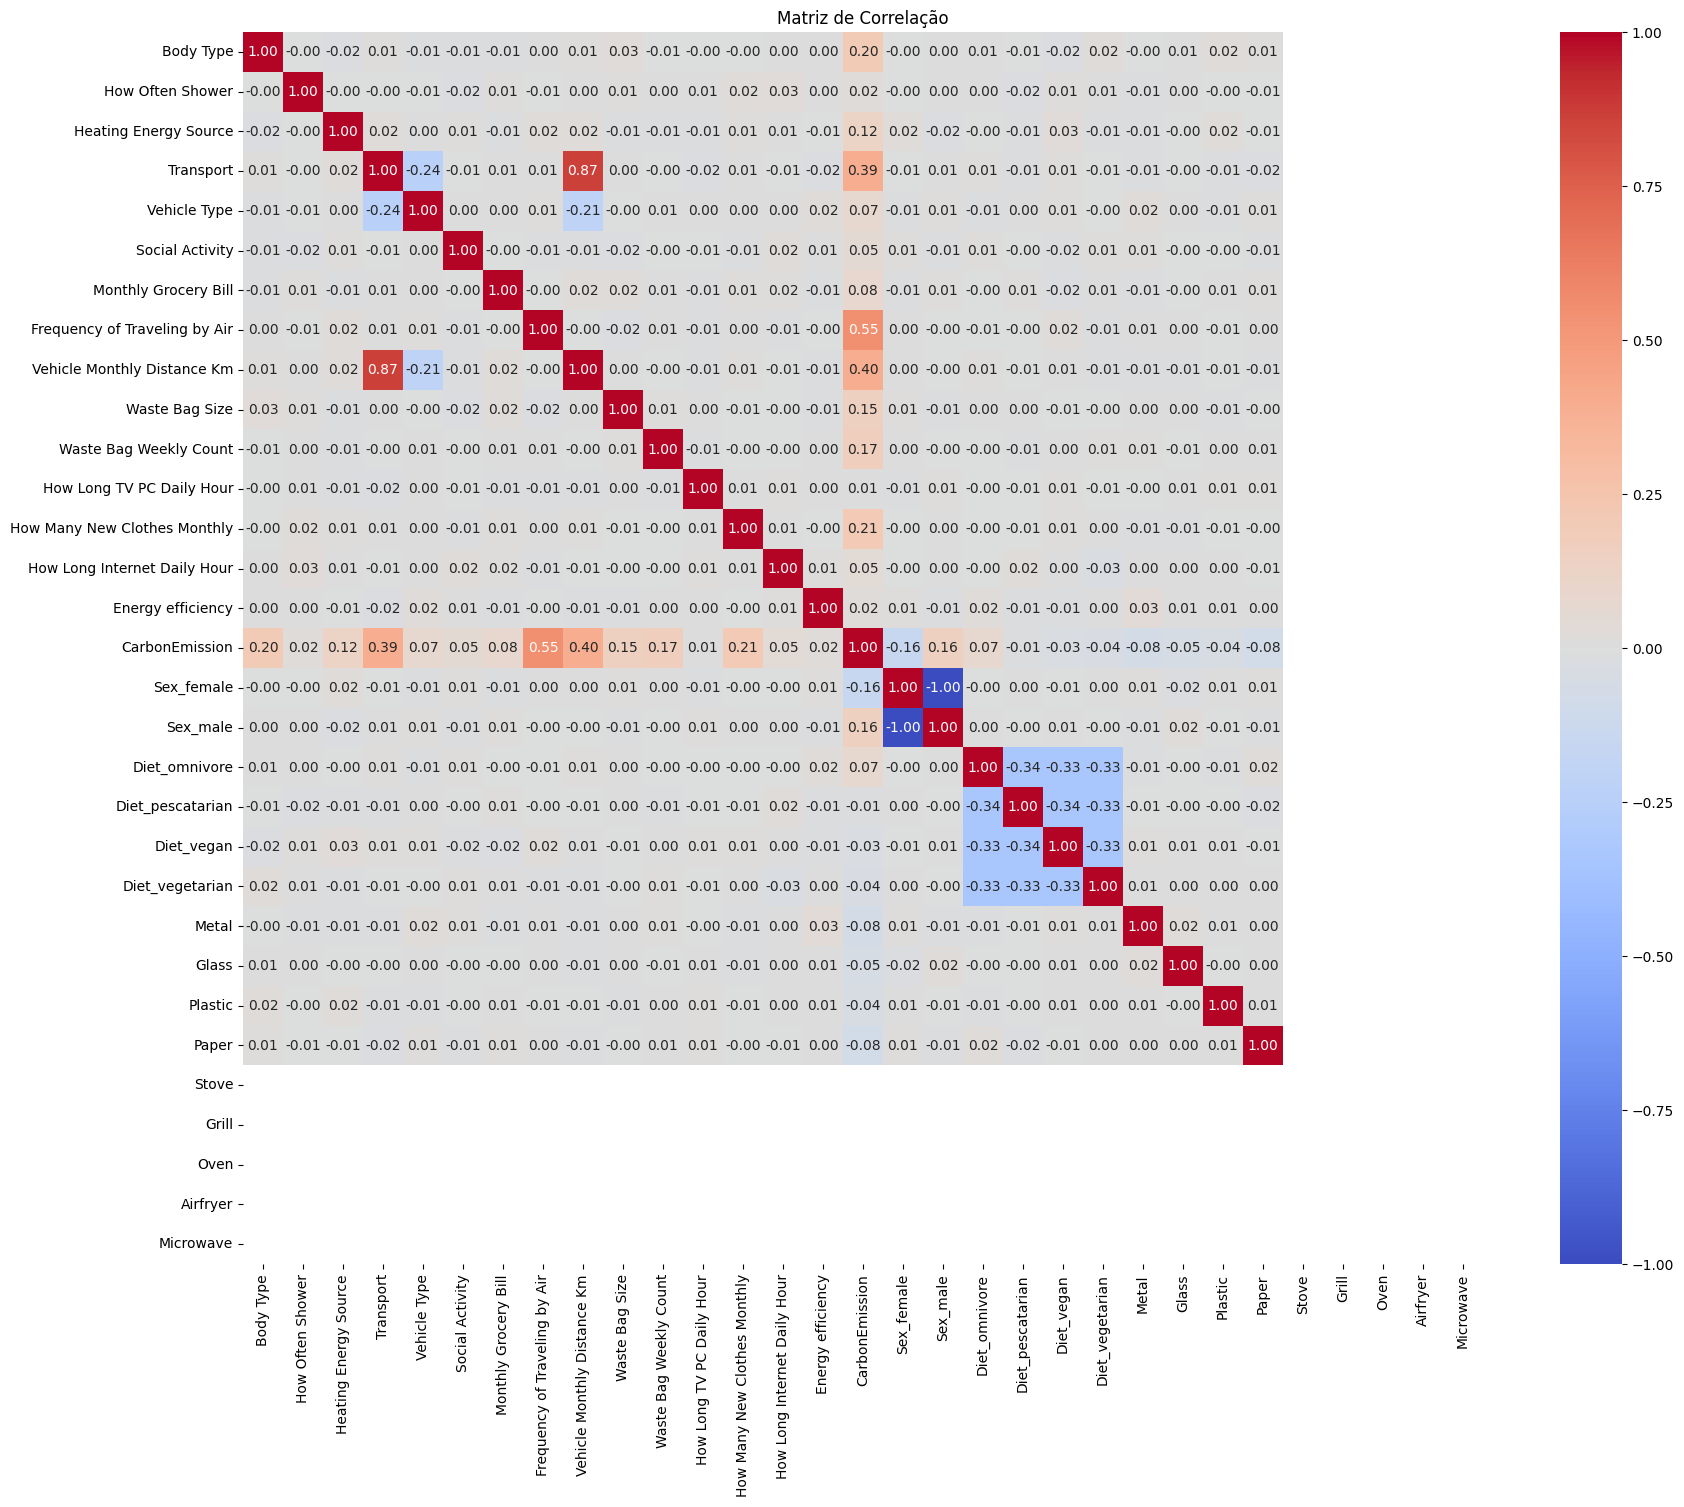

In [737]:
# Suponha que "dados" seja o DataFrame original antes do MinMaxScaler
correlation_matrix = pd.DataFrame(dados).corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Opcional: Visualizar com um mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [738]:
# Realiza separação do dados de treino e teste
X = dados.drop('CarbonEmission', axis=1)
y = dados['CarbonEmission']

In [739]:
scaler = MinMaxScaler()
X = scaler.fit_transform(dados)

In [740]:
# Realiza o treinamento e teste dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [741]:
# Cria função 'machine' que facilita na repetição de parte do código
def machine(nome, modelo):
  modelo.fit(X_train, y_train)
  pred = modelo.predict(X_test)
  score = accuracy_score(pred, y_test)
  print(f'{nome} {round(score*100, 2)}')
  report = classification_report(pred, y_test)
  print(report)

log = LogisticRegression()
dtr = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC(C=0.9)
knn = KNeighborsClassifier(n_neighbors=1)
red = MLPClassifier( hidden_layer_sizes=(100, 50, 20),activation='logistic')
mnb = MultinomialNB()
gbm = GradientBoostingClassifier()
xgbc = XGBClassifier(random_state=42, device='cuda')

lista = (log, dtr, rfc, svm, knn, red, mnb, gbm, xgbc)
nomes = ('Regressão Logística', 'Árvores de Decisão', 'Random Forests', 'SVM (Support Vector Machines)', 'KNN (K-Nearest Neighbors)', 'Rede neural',
         'Multinomial Naive Bayes', 'Gradient Boosting Machines (GBM)', 'XGBClassifier')


In [742]:
# Testa todas a linguagens para identificar qual melhor estima o resultado
for a in range(0, 9):
  machine(nomes[a], lista[a])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regressão Logística 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00       392
           4       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Árvores de Decisão 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00       392
           4       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00   

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:19] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:19] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


XGBClassifier 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       433
           3       1.00      1.00      1.00       392
           4       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [743]:
copia_graficos.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Not provided,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,Not provided,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,Not provided,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [744]:
copia_graficos['Monthly Grocery Bill'] = dados['Monthly Grocery Bill']
copia_graficos['Vehicle Monthly Distance Km'] = dados['Vehicle Monthly Distance Km']
copia_graficos['How Long TV PC Daily Hour'] = dados['How Long TV PC Daily Hour']
copia_graficos['How Many New Clothes Monthly'] = dados['How Many New Clothes Monthly']
copia_graficos['How Long Internet Daily Hour'] = dados['How Long Internet Daily Hour']
copia_graficos['CarbonEmission'] = dados['CarbonEmission']

In [745]:
copia_graficos.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,Not provided,often,4,frequently,1,large,4,1,2,0,No,['Metal'],"['Stove', 'Oven']",2
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,Not provided,often,2,rarely,0,extra large,3,1,3,0,No,['Metal'],"['Stove', 'Microwave']",2
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,2,never,2,small,1,2,3,1,Sometimes,['Metal'],"['Oven', 'Microwave']",3
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,Not provided,sometimes,3,rarely,1,medium,3,3,0,1,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",0
4,obese,female,vegetarian,daily,coal,private,diesel,often,5,very frequently,3,large,1,0,0,1,Yes,['Paper'],['Oven'],4


<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


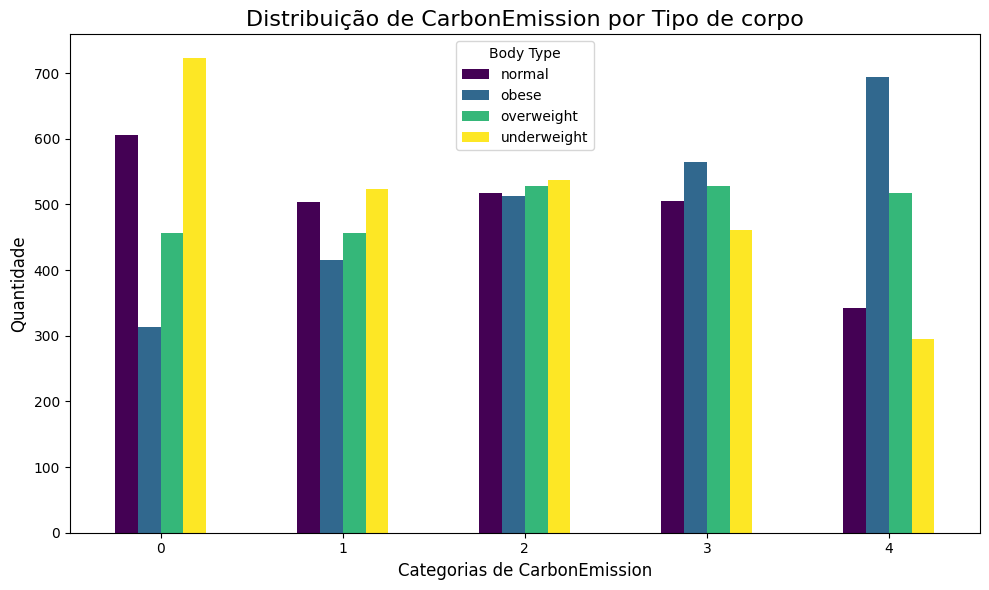

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


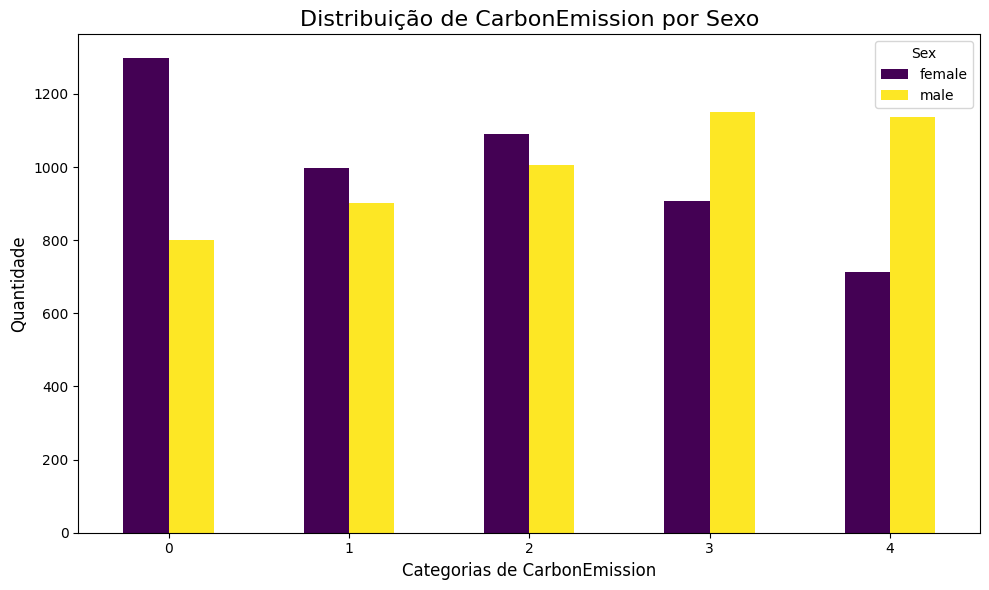

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


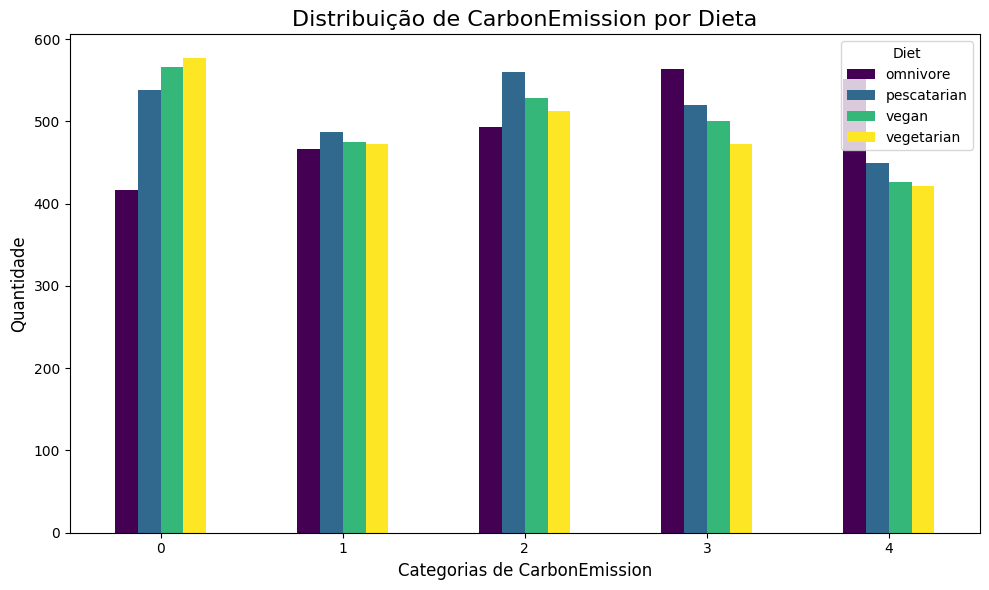

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


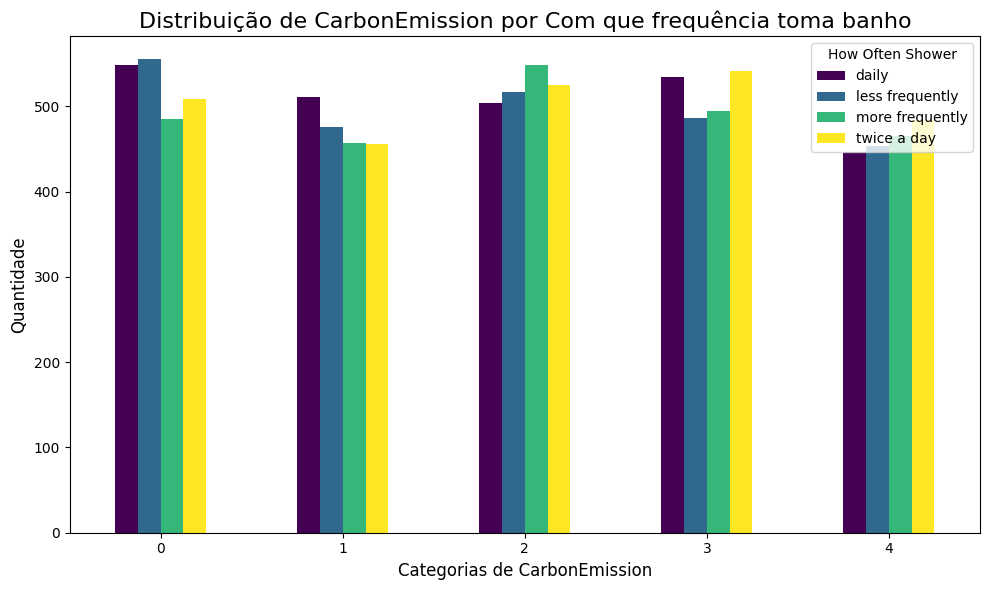

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


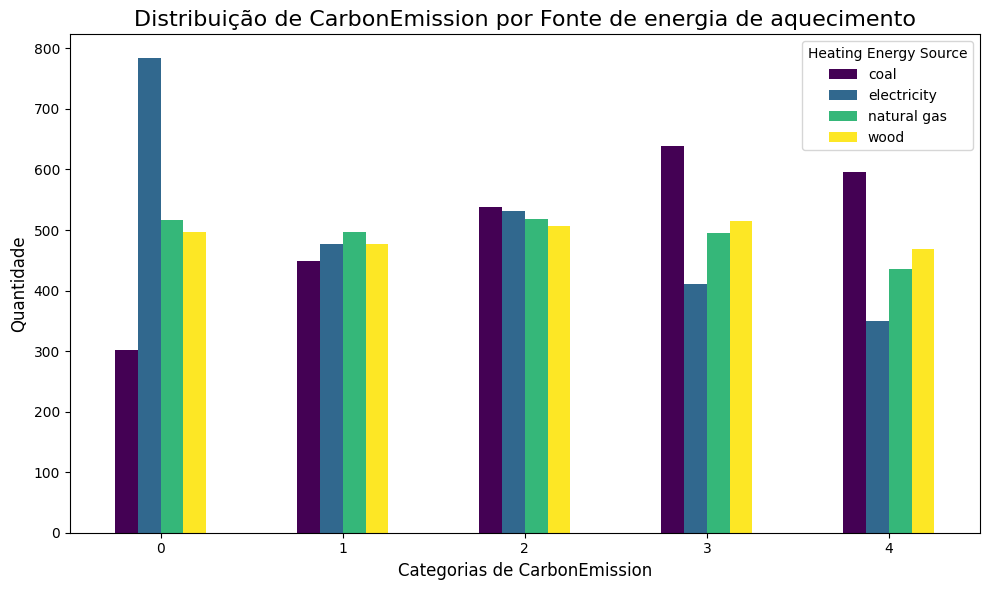

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


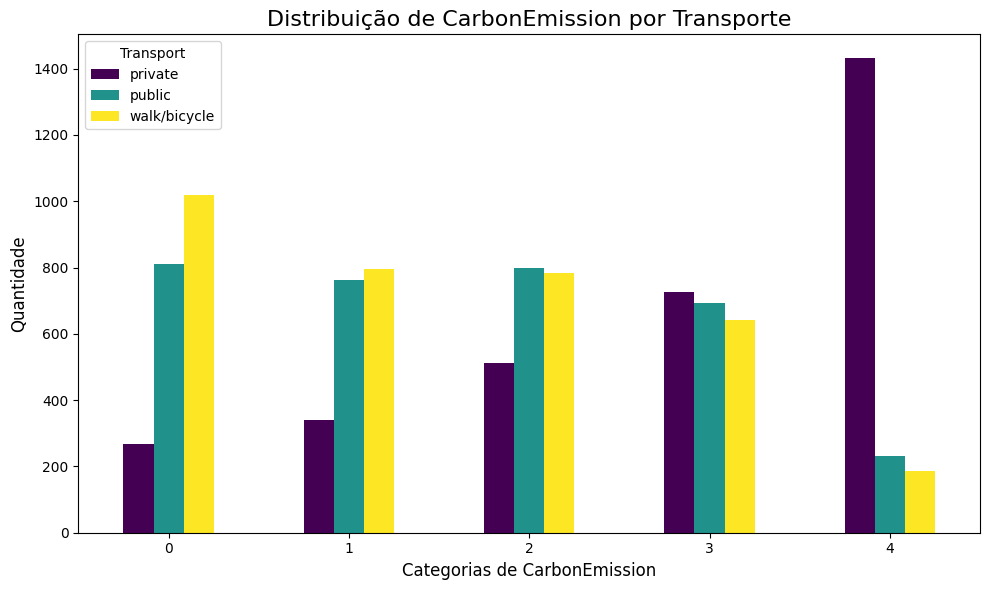

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


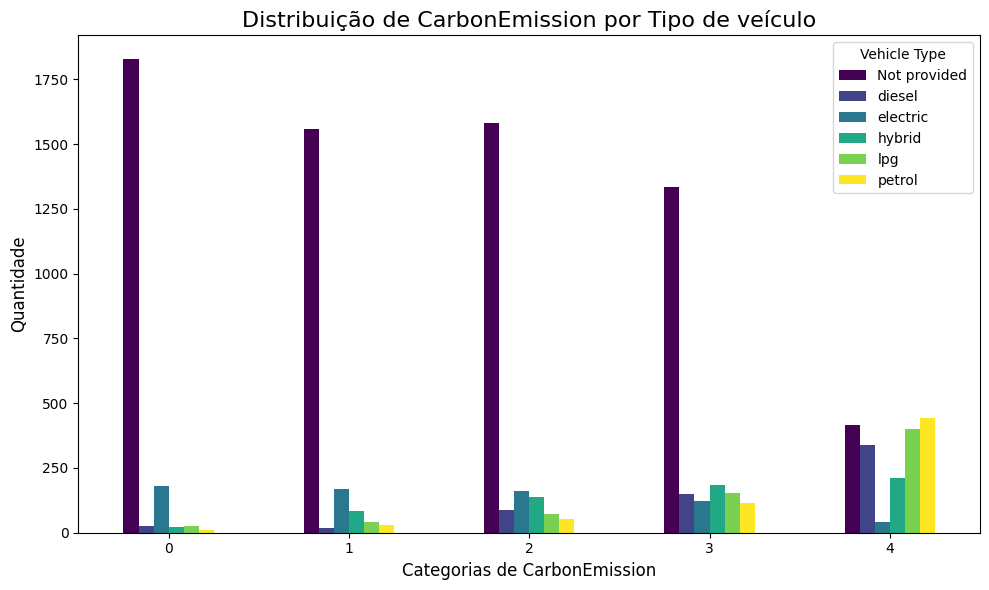

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


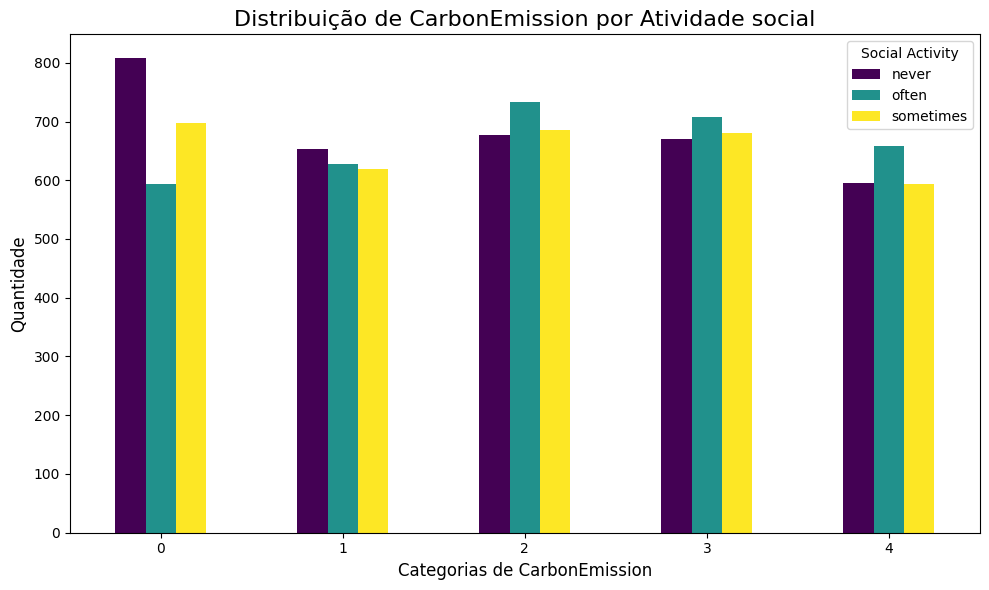

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


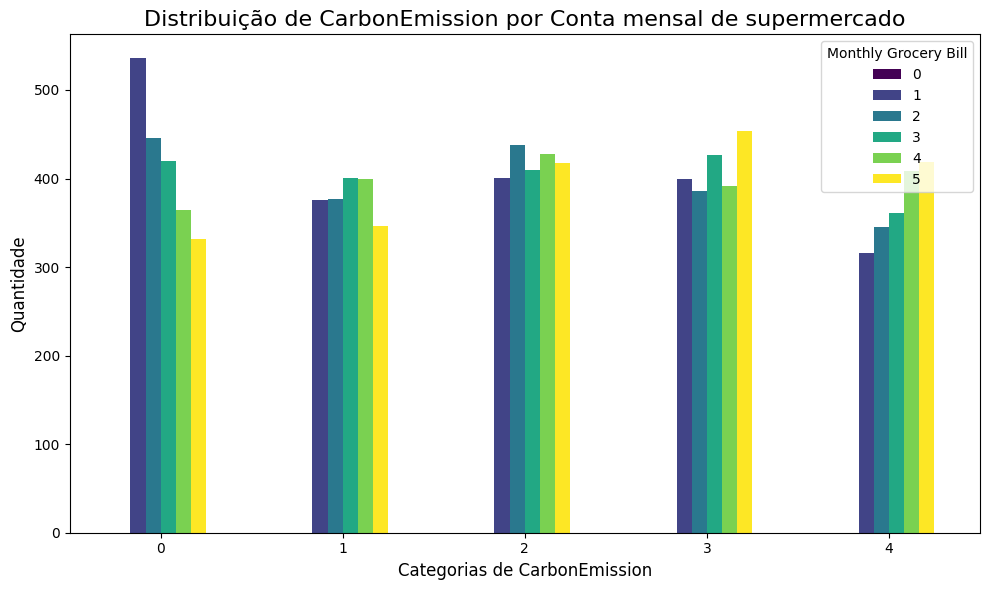

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


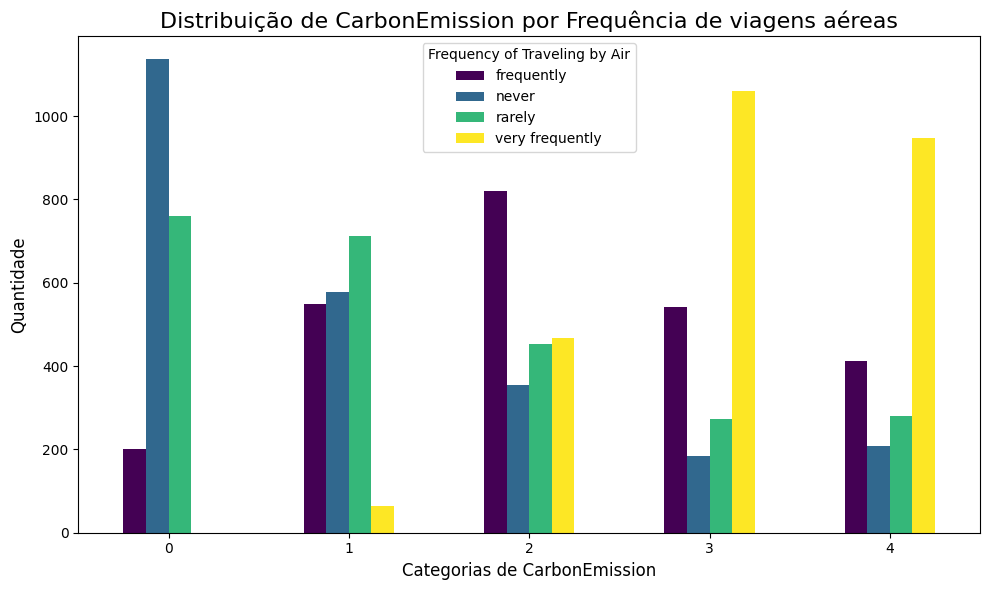

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


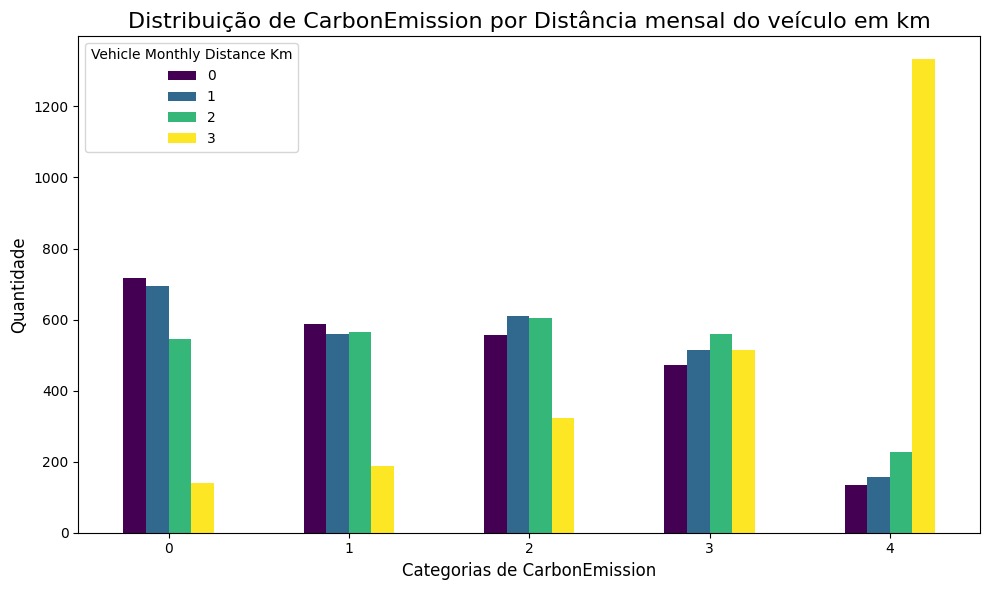

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


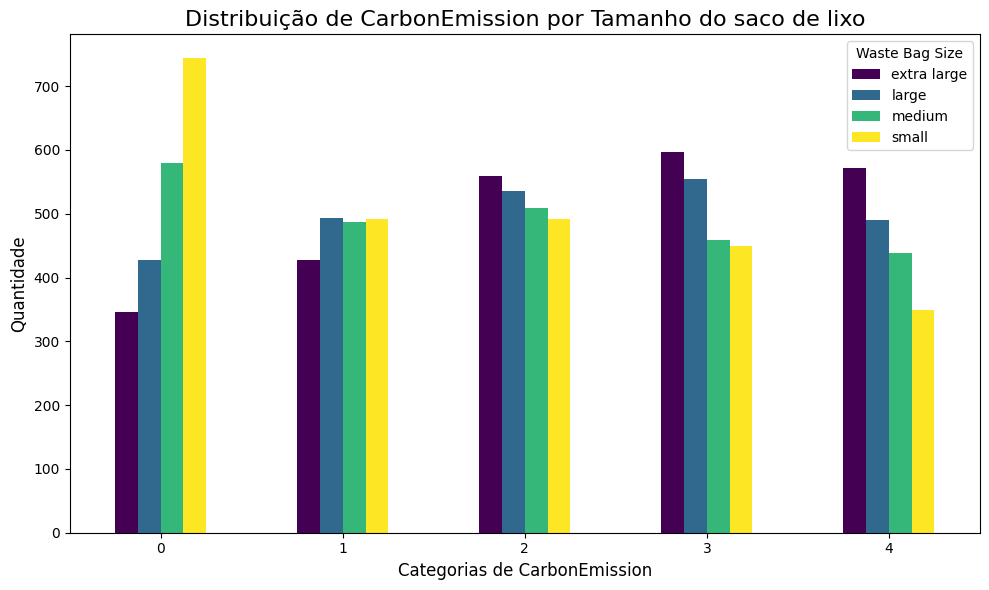

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


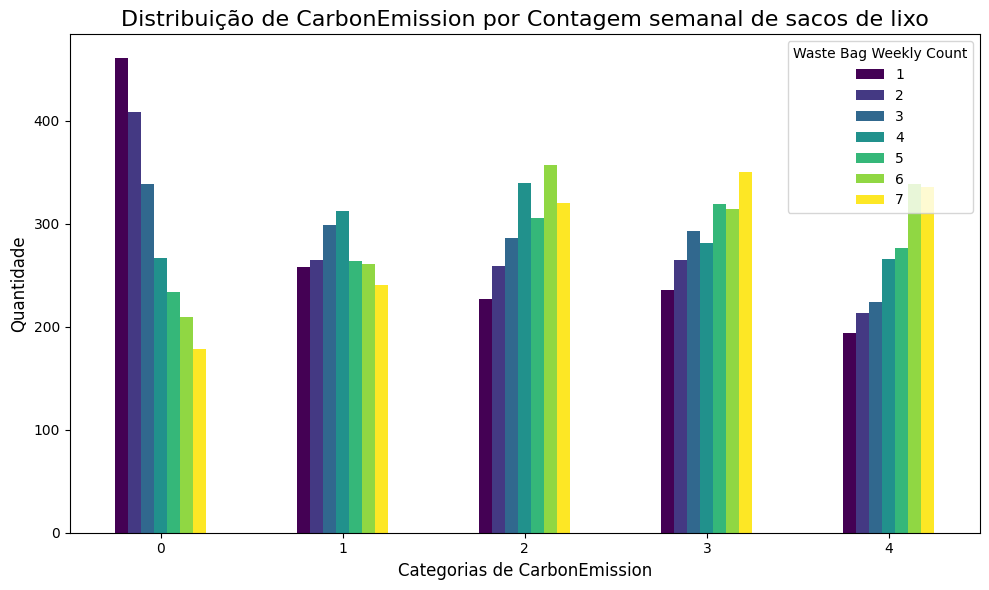

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


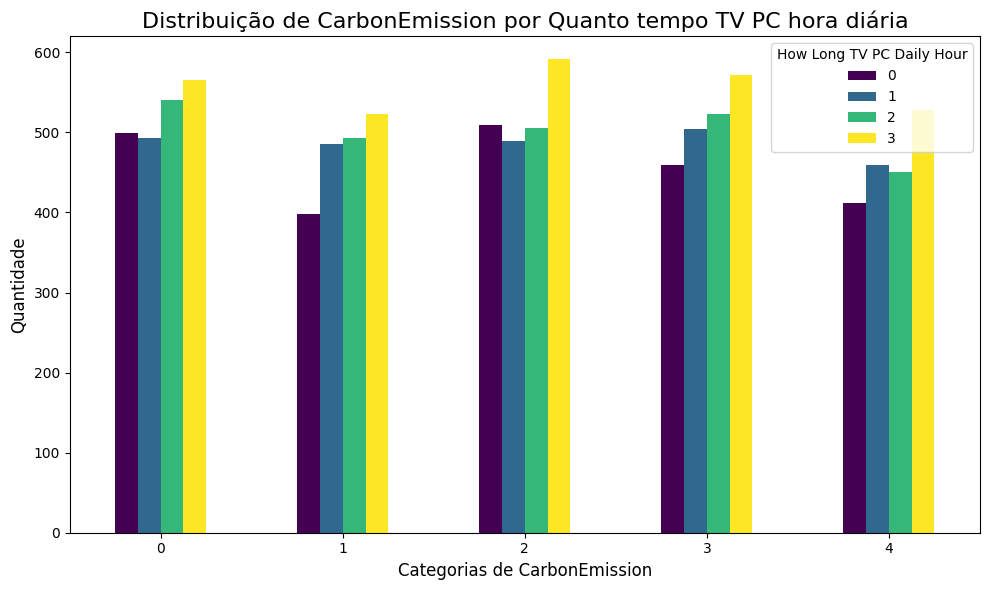

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


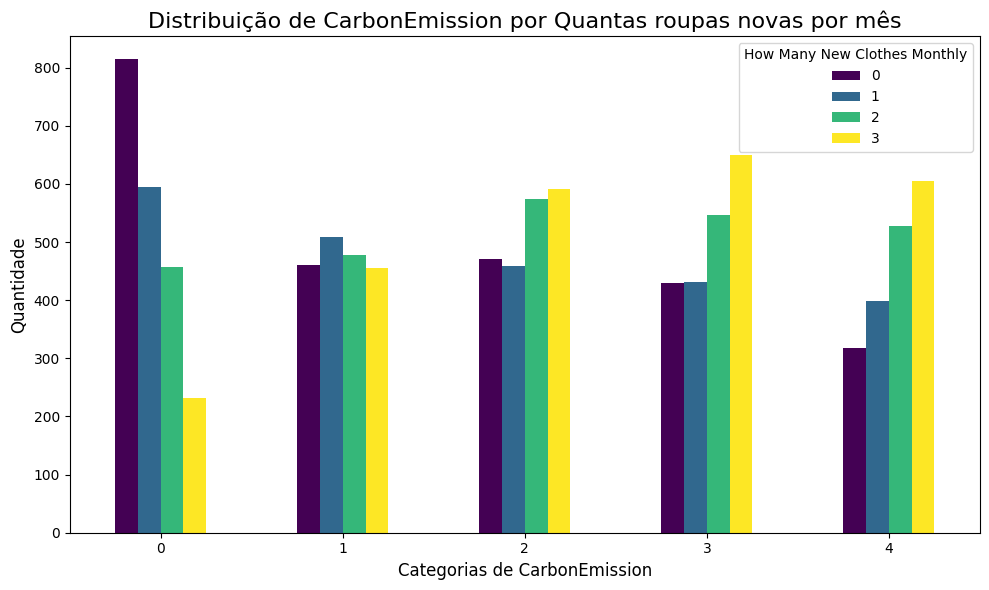

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


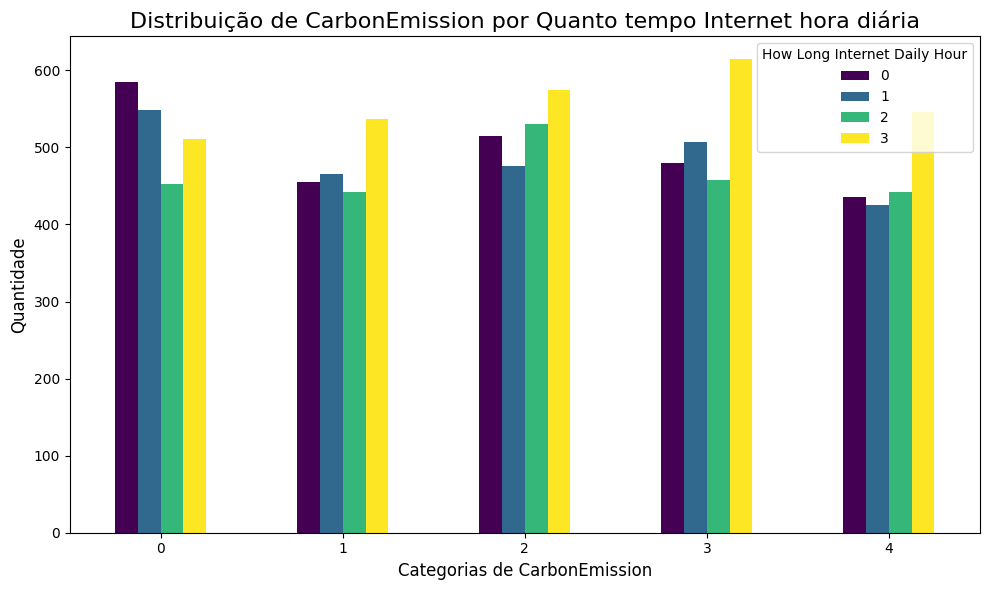

<ipython-input-746-563d7952ee41>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()


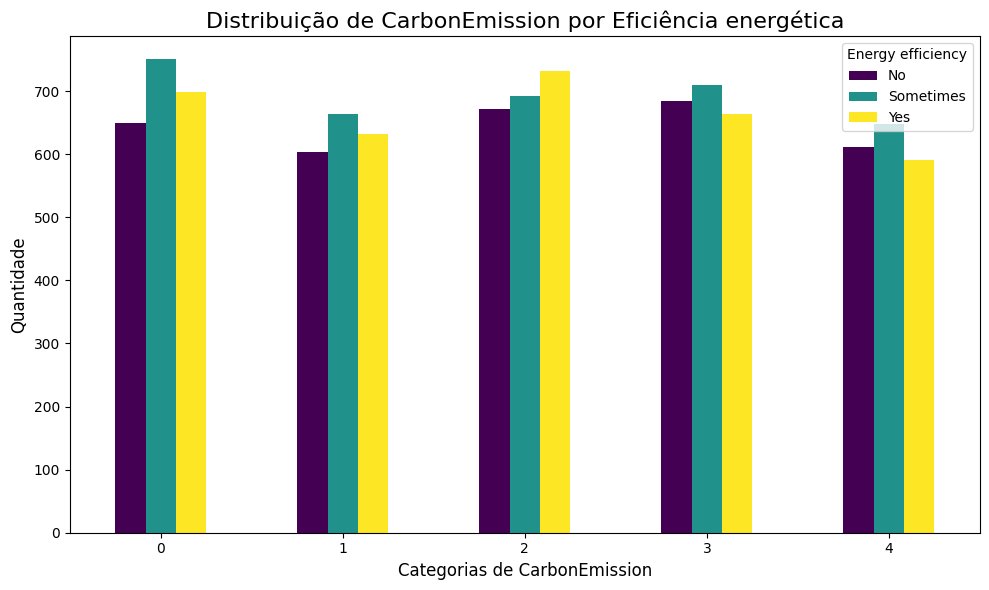

In [746]:
colunas = ('Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type',
           'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air','Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count',
           'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency')
colunas_titulo = ('Tipo de corpo', 'Sexo', 'Dieta', 'Com que frequência toma banho', 'Fonte de energia de aquecimento', 'Transporte', 'Tipo de veículo',
                  'Atividade social', 'Conta mensal de supermercado', 'Frequência de viagens aéreas', 'Distância mensal do veículo em km', 'Tamanho do saco de lixo',
                  'Contagem semanal de sacos de lixo', 'Quanto tempo TV PC hora diária', 'Quantas roupas novas por mês', 'Quanto tempo Internet hora diária',
                  'Eficiência energética')
def graficos (coluna, tit_coluna):
  # Agrupar os dados por CarbonEmission e Sex, contando as ocorrências
  dados_grafico = copia_graficos.groupby(['CarbonEmission', coluna]).size().unstack()

  # Plotar o gráfico de barras
  dados_grafico.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')

  # Configurações do gráfico
  plt.title(f'Distribuição de CarbonEmission por {tit_coluna}', fontsize=16)
  plt.xlabel('Categorias de CarbonEmission', fontsize=12)
  plt.ylabel('Quantidade', fontsize=12)
  plt.xticks(rotation=0)  # Mantém as labels do eixo X na horizontal
  plt.legend(title=coluna, fontsize=10)
  plt.tight_layout()
  plt.show()

for num, col in enumerate(colunas):
  #print(col, num)
  graficos(col, colunas_titulo[num])

In [747]:
X = usuario[['Quantity', 'Total', 'Recencia']] #Selecionando as características relevantes para clustering

#Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Escolhendo o número de clusters através dos métodos de Elbow
num_clusters = 5

#Aplicando o algoritmo K-Means - escolhido após avaliação das outras ferramentas
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

#Adicionando os rótulos dos clusters aos dados originais
usuario['cluster'] = kmeans.labels_

#Visualizando os clusters
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    cluster_data = usuario[usuario['cluster'] == cluster]
    plt.scatter(cluster_data['Quantity'], cluster_data['Total'], label=f'Cluster {cluster}')

plt.xlabel('Quantity')
plt.ylabel('Valor Total')
plt.title('Clusters de Compras')
plt.legend()
plt.show()

NameError: name 'usuario' is not defined